In [18]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [82]:
dt = 0.2
header = ["DMagnitude", "X", "Y", "Z"]
name = "data/dati_oggetto_"
"""
P = Paloncino
F = Ferro
L = Legno
"""
objects_indexes = {1 : "P", 2 : "F", 3 : "L", 4 : "P", 5 : "F", 6 : "F"}
resistance_indexes = {"P" : "S", "F" : "H", "L" : "H"}

In [41]:
def res_color(res):
    color_map = {"S" : "green", "M" : "blue", "H" : "red"}
    return color_map[res]

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def linear_regr(x, y):
    x = x.reshape(-1,1)
    model = LinearRegression()
    model.fit(x, y)
    coef =  model.coef_
    intercept =  model.intercept_
    return model.predict(x), coef, intercept

In [112]:
def peak_position(x, y):
    max_idx = y.index(max(y))
    return x[max_idx], y[max_idx]

In [86]:
max_index = 7

In [113]:
def plot_data(name, request_data, max_index, dt, lin_reg = False, peak_view = False):
    for i in range (1, max_index):
        data = pd.read_csv(f"{name}{i}.csv", header = 0, names = header)
        time = len(data) * dt 
        dmagnitude = data[request_data]
        filtered = [x for x in dmagnitude if x != 0]
        time_step = np.linspace(0, time, len(filtered))
        if lin_reg:
            lin, coef, inter = linear_regr(time_step, filtered)
            plt.plot(time_step, lin, c = res_color(resistance_indexes[objects_indexes[i]]))
            plt.title(f"Linear Regression {request_data} Curve")
        elif peak_view:
            peak_pos_x, peak_pos_y = peak_position(time_step, filtered)
            plt.scatter(peak_pos_x, peak_pos_y, c = res_color(resistance_indexes[objects_indexes[i]]))
            plt.title(f"Peak Position of {request_data}")
        else:
            plt.plot(time_step, filtered, c = res_color(resistance_indexes[objects_indexes[i]]))
            plt.title(f"{request_data} Curve")
        plt.xlabel("Discrete Time Steps")
        plt.ylabel("Dmagnitude Over Time")

        
    plt.show()

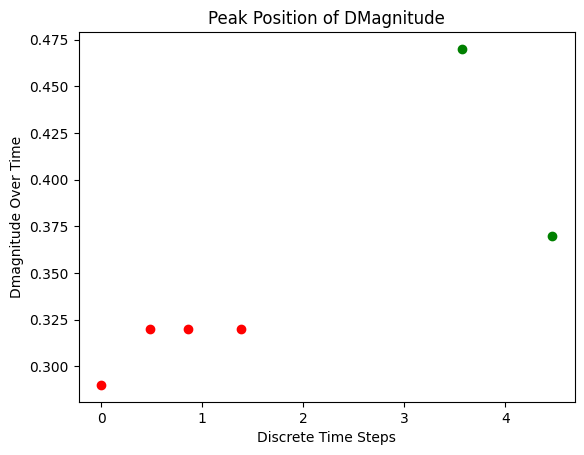

In [114]:
plot_data(name, "DMagnitude", max_index, dt, lin_reg=False, peak_view=True)

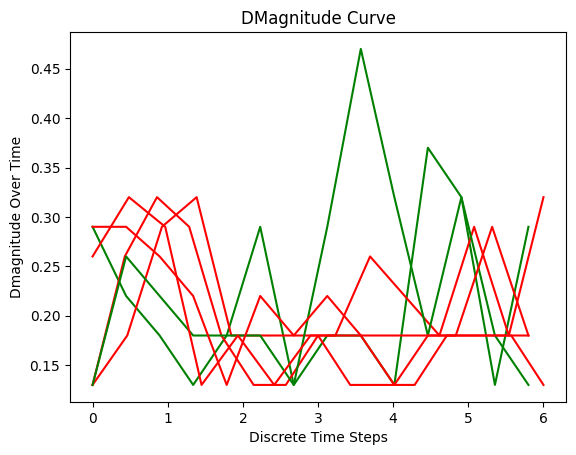

In [115]:
plot_data(name, "DMagnitude", max_index, dt, lin_reg=False)

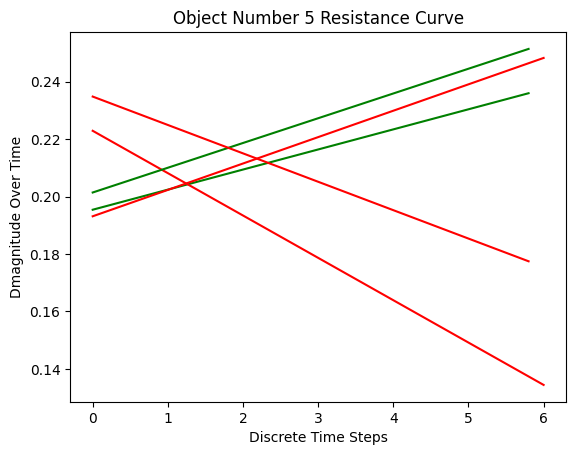

In [57]:
for i in range (1, 6):
    data = pd.read_csv(f"data/dati_oggetto_{i}.csv", header = 0, names = header)
    time = len(data) * dt 
    dmagnitude = data["DMagnitude"]
    filtered = [x for x in dmagnitude if x != 0]
    time_step = np.linspace(0, time, len(filtered))
    lin, coef, inter = linear_regr(time_step, filtered)
    plt.plot(time_step, lin, c = res_color(resistance_indexes[objects_indexes[i]]))
    plt.title(f"Object Number {i} Resistance Curve")
    plt.xlabel("Discrete Time Steps")
    plt.ylabel("Dmagnitude Over Time")
    #plt.savefig(f"curve_di_profilo/curva_oggetto_{i}.png")
plt.show()